In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

seed=2024
np.random.seed(seed)

In [2]:
#config
num_classes = 6
prefix = '6C'

#df_full_augmented = pd.read_csv("../../data/dataframes/all_patchs_dataframe_augmented.csv")
df_full_not_augmented = pd.read_csv("../../data/dataframes/all_patchs_dataframe.csv")

# select the rows where the patch name are are valid 
regex = r'_row_\d+_col_\d+'
regex_general = r'row_.*_col_.*'

valid_duplicates =  r'_row_\d+_col_\d+\(\d+\)'

list_classes = df_full_not_augmented['classe'].unique()
list_labels = [0, 1, 2, 3, 4, 5]
list_classes, list_labels

(array(['Acinaire', 'Fibrose', 'Foetal', 'Glandulaire complexe',
        'Hémorragique', 'Lépidique', 'Micropapillaire', 'Mucineux',
        'Normal', 'Nécrose', 'Papillaire', 'Réactionnel', 'Solide',
        'Tissu lymphoïde'], dtype=object),
 [0, 1, 2, 3, 4, 5])

In [4]:
if prefix == "6C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'T', 'Acinaire':'T','Foetal':'T','Lépidique':'T','Mucineux':'T', 'Papillaire':'T',
                'Solide':'T', 'Glandulaire complexe':'T','Micropapillaire':'T'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'T':5}
elif prefix=="7C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'TuGr12', 'Acinaire':'TuGr12','Foetal':'TuGr12','Lépidique':'TuGr12','Mucineux':'TuGr12', 'Papillaire':'TuGr12',
                'Solide':'TuGr3', 'Glandulaire complexe':'TuGr3','Micropapillaire':'TuGr3'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'TuGr12':5, "TuGr3":6}
    
label_to_idx = {v:k for k,v in idx_to_label.items()}

label_to_idx

{0: 'P', 1: 'H', 2: 'Né', 3: 'TL', 4: 'Fi', 5: 'T'}

In [5]:
df_full_not_augmented['tetraClass'] = df_full_not_augmented['classe'].apply(lambda x : all_classes[x]) 
df_full_not_augmented['label'] = df_full_not_augmented['tetraClass'].apply(lambda x: idx_to_label[x])
df_full_not_augmented = df_full_not_augmented.sort_values(by='label')
df_full_not_augmented

,Patient,lame,patch,classe,tetraClass,label
14255,398,R,R_398_A (1080).jpg,Réactionnel,P,0
14201,398,R,R_398_A (397).jpg,Réactionnel,P,0
14202,231,R,R_231_A (175).jpg,Réactionnel,P,0
14203,7,R,R_7_A (2463).jpg,Réactionnel,P,0
14204,231,R,R_231_A (121).jpg,Réactionnel,P,0
...,...,...,...,...,...,...
6091,13,D,13_D_row_109_col_54(1).jpg,Lépidique,T,5
6090,133,A,133_A_row_382_col_211.jpg,Lépidique,T,5
6089,133,B,133_B_row_60_col_87.jpg,Lépidique,T,5
6097,13,D,13_D_row_76_col_26(1).jpg,Lépidique,T,5


In [6]:
# remove duplicates
df_full_not_augmented = df_full_not_augmented[~df_full_not_augmented['patch'].str.contains(valid_duplicates)]
df_full_not_augmented

,Patient,lame,patch,classe,tetraClass,label
14255,398,R,R_398_A (1080).jpg,Réactionnel,P,0
14201,398,R,R_398_A (397).jpg,Réactionnel,P,0
14202,231,R,R_231_A (175).jpg,Réactionnel,P,0
14203,7,R,R_7_A (2463).jpg,Réactionnel,P,0
14204,231,R,R_231_A (121).jpg,Réactionnel,P,0
...,...,...,...,...,...,...
6093,133,A,133_A_row_384_col_244.jpg,Lépidique,T,5
6092,226,C,226_C_row_36_col_135.jpg,Lépidique,T,5
6090,133,A,133_A_row_382_col_211.jpg,Lépidique,T,5
6089,133,B,133_B_row_60_col_87.jpg,Lépidique,T,5


In [7]:
df_full_augmented_valid = df_full_not_augmented[df_full_not_augmented['patch'].str.contains(regex_general)]
df_full_augmented_not_valid = df_full_not_augmented[~df_full_not_augmented['patch'].str.contains(regex_general)]
df_full_augmented_valid

,Patient,lame,patch,classe,tetraClass,label
9214,40,A,40_A_row_217_col_91.jpg,Normal,P,0
9218,2,B,2_B_row_65_col_42.jpg,Normal,P,0
9227,7,A,7_A_row_105_col_64.jpg,Normal,P,0
9238,44,A,44_A_row_33_col_145.jpg,Normal,P,0
9226,7,A,7_A_row_77_col_88.jpg,Normal,P,0
...,...,...,...,...,...,...
6093,133,A,133_A_row_384_col_244.jpg,Lépidique,T,5
6092,226,C,226_C_row_36_col_135.jpg,Lépidique,T,5
6090,133,A,133_A_row_382_col_211.jpg,Lépidique,T,5
6089,133,B,133_B_row_60_col_87.jpg,Lépidique,T,5


In [8]:
# print the valid patients
all_patients = sorted(df_full_not_augmented['Patient'].unique())
valid_patients = sorted(df_full_augmented_valid['Patient'].unique())
non_valid_patients = sorted(df_full_augmented_not_valid['Patient'].unique())
mixed_patients = list(set(valid_patients) & set(non_valid_patients))
print('all patients:', all_patients)
print('patients with valid data:', valid_patients)
print('patients with non valid data:', non_valid_patients)
print('patients with mixed data:', mixed_patients)

valid_patients = [patient for patient in valid_patients if patient not in mixed_patients]
print('patients with valid data:', valid_patients)

valid_patients.remove(58)
valid_patients.remove(226)
valid_patients.remove(133)
non_valid_patients.append(58)
non_valid_patients.append(226)
non_valid_patients.append(133)

print('\n\npatients test:', valid_patients)
print('patients train:', non_valid_patients)


all patients: [2, 3, 4, 5, 6, 7, 9, 13, 14, 16, 17, 22, 23, 32, 40, 44, 58, 72, 114, 133, 169, 192, 226, 230, 231, 247, 398]
patients with valid data: [2, 7, 13, 17, 32, 40, 44, 58, 133, 192, 226]
patients with non valid data: [3, 4, 5, 6, 7, 9, 14, 16, 22, 23, 72, 114, 169, 230, 231, 247, 398]
patients with mixed data: [7]
patients with valid data: [2, 13, 17, 32, 40, 44, 58, 133, 192, 226]


patients test: [2, 13, 17, 32, 40, 44, 192]
patients train: [3, 4, 5, 6, 7, 9, 14, 16, 22, 23, 72, 114, 169, 230, 231, 247, 398, 58, 226, 133]


In [9]:
patients_test={patient : 'test' for patient in valid_patients}
patients_train={patient : 'train' for patient in all_patients if patient not in valid_patients}

patients_to_dataset = {**patients_train, **patients_test}

print('Total n patients:', len(patients_to_dataset), '      n train patients:', len(patients_train), '     n test patients', len(patients_test))

df_full_not_augmented['dataset']=df_full_not_augmented['Patient'].apply(lambda x : patients_to_dataset[int(x)])

Total n patients: 27       n train patients: 20      n test patients 7


In [10]:
dtrain= df_full_not_augmented.loc[df_full_not_augmented['dataset']=='train']
dtest = df_full_not_augmented.loc[df_full_not_augmented['dataset']=='test']

print('number of training samples:', len(dtrain), '     number of test samples:', len(dtest))

number of training samples: 18684      number of test samples: 2395


In [11]:
# save the splits
support_split_path = "../../data/splits/"+prefix+"_support.csv"
query_split_path = "../../data/splits/"+prefix+"_query.csv"
dtrain.to_csv(support_split_path, index=False)
dtest.to_csv(query_split_path, index=False)

In [12]:
if prefix=="7C": 
    colors_tetraclass=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'gold', 'crimson']
elif prefix=="6C": 
    colors_tetraclass=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'crimson']
explode_tetraclass=tuple([0.05]*len(colors_tetraclass))

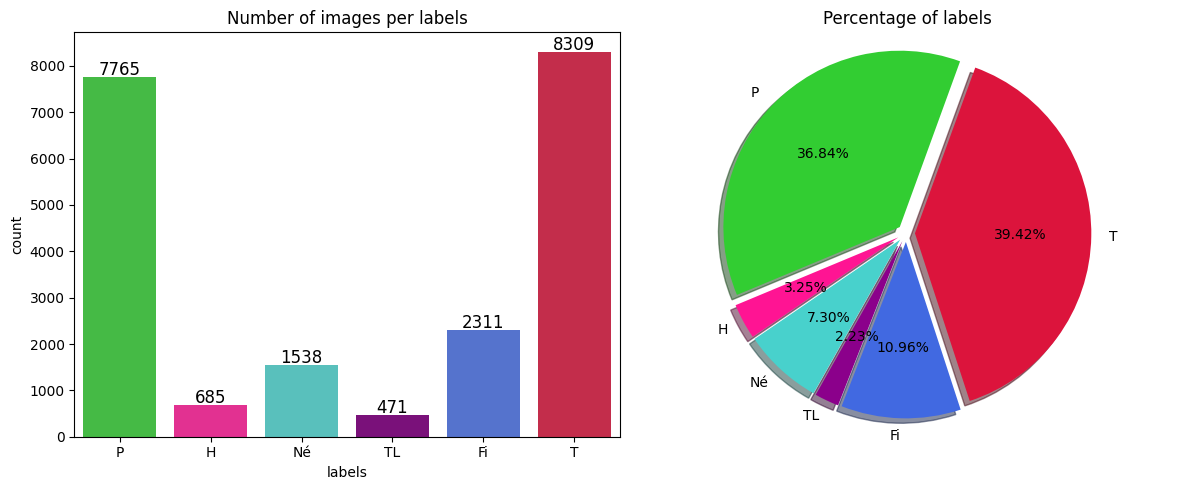

In [19]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df_full_not_augmented, x='tetraClass', palette=colors_tetraclass)
ax = plt.gca()
plt.xlabel('labels')
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of images per labels")
plt.subplot(122)
explode_tetraclass=tuple([0.05]*len(colors_tetraclass))
sizes = [df_full_not_augmented["tetraClass"].value_counts()[val] for val in idx_to_label.keys()]
plt.pie(sizes, explode=explode_tetraclass, colors=colors_tetraclass, labels=list(idx_to_label.keys()),  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of labels')
plt.tight_layout()
plt.savefig(f'Statistics of labels splits {prefix}.jpeg')
plt.show()

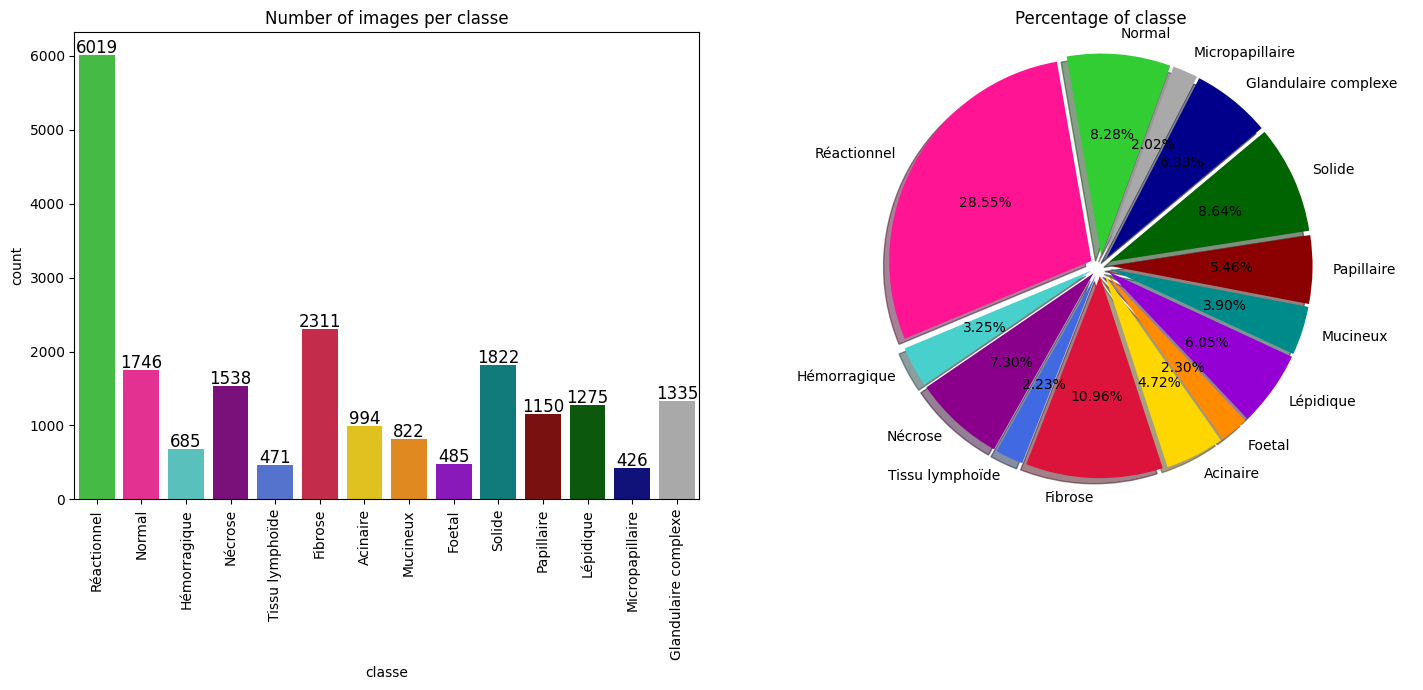

In [14]:
# 14 colors
colors_classe = ['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'crimson', 'gold', 'darkorange', 'darkviolet', 'darkcyan', 'darkred', 'darkgreen', 'darkblue', 'darkgrey']
explode_c=tuple([0.05]*len(colors_classe))
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.countplot(df_full_not_augmented, x='classe', palette=colors_classe)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation='vertical')
plt.title("Number of images per classe")

plt.subplot(122)
sizes = [df_full_not_augmented["classe"].value_counts()[val] for val in all_classes.keys() if val in df_full_not_augmented["classe"].unique()]
plt.pie(sizes, explode=explode_c, colors=colors_classe, labels=[val for val in all_classes.keys() if val in df_full_not_augmented["classe"].unique()],  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of classe')
plt.tight_layout()
plt.savefig(f'Statistics of class splits {prefix}.jpeg')
plt.show()

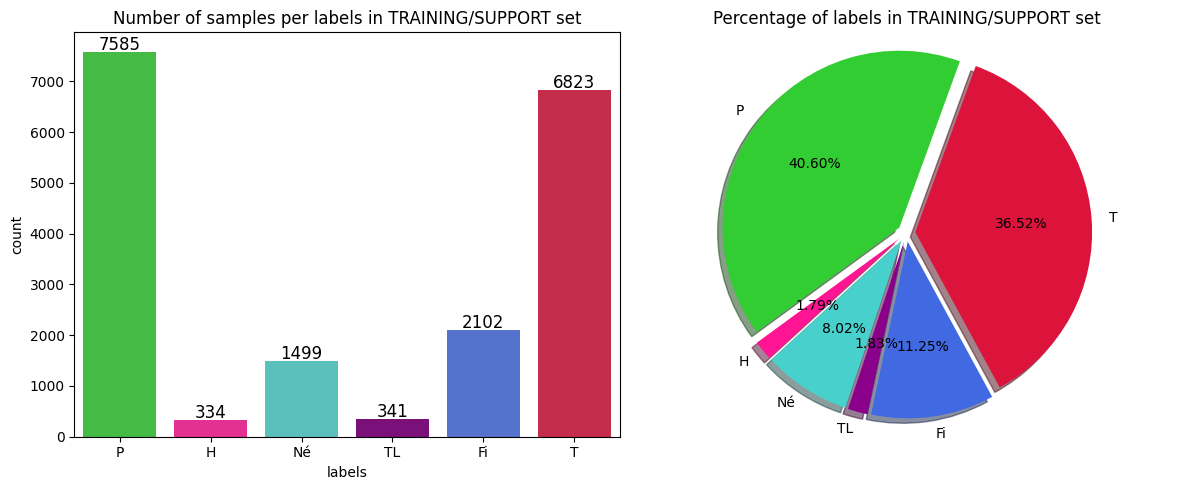

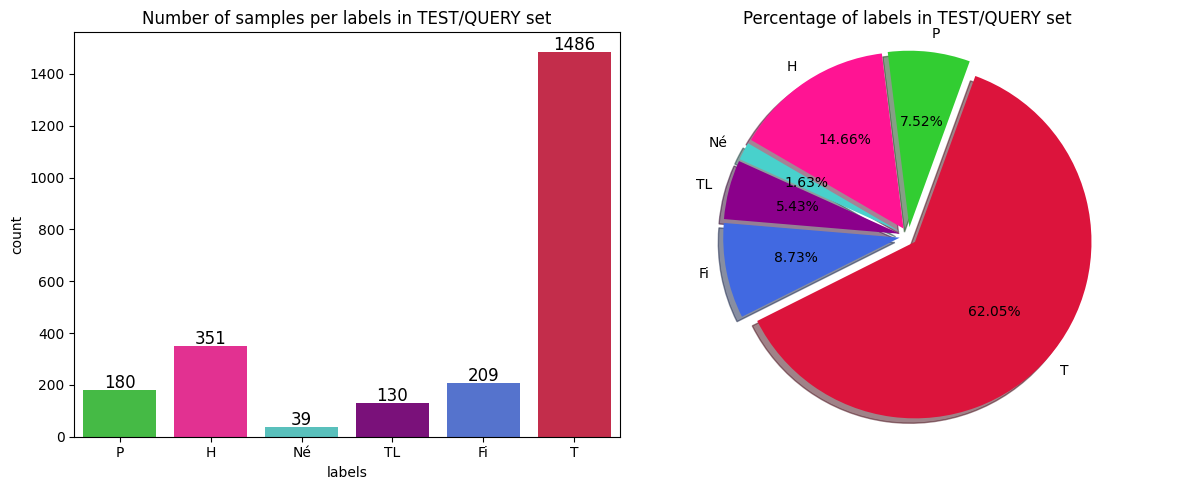

In [20]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df_full_not_augmented.loc[df_full_not_augmented['dataset']=='train'], x='tetraClass', palette=colors_tetraclass)
plt.xlabel('labels')
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of samples per labels in TRAINING/SUPPORT set")

plt.subplot(122)
sizes = [df_full_not_augmented.loc[df_full_not_augmented['dataset']=='train']["tetraClass"].value_counts()[val] for val in idx_to_label.keys()]
plt.pie(sizes, explode=explode_tetraclass, labels=list(idx_to_label.keys()), colors=colors_tetraclass,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of labels in TRAINING/SUPPORT set')
plt.tight_layout()
plt.savefig(f'Statistics of training labels splits {prefix}.jpeg')
plt.show()

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df_full_not_augmented.loc[df_full_not_augmented['dataset']=='test'], x='tetraClass', palette=colors_tetraclass)
plt.xlabel('labels')
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of samples per labels in TEST/QUERY set")

plt.subplot(122)
sizes = [df_full_not_augmented.loc[df_full_not_augmented['dataset']=='test']["tetraClass"].value_counts()[val] for val in idx_to_label.keys()]
plt.pie(sizes, explode=explode_tetraclass, labels=list(idx_to_label.keys()), colors=colors_tetraclass,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of labels in TEST/QUERY set')
plt.tight_layout()
plt.savefig(f'Statistics of testing labels splits {prefix}.jpeg')
plt.show()

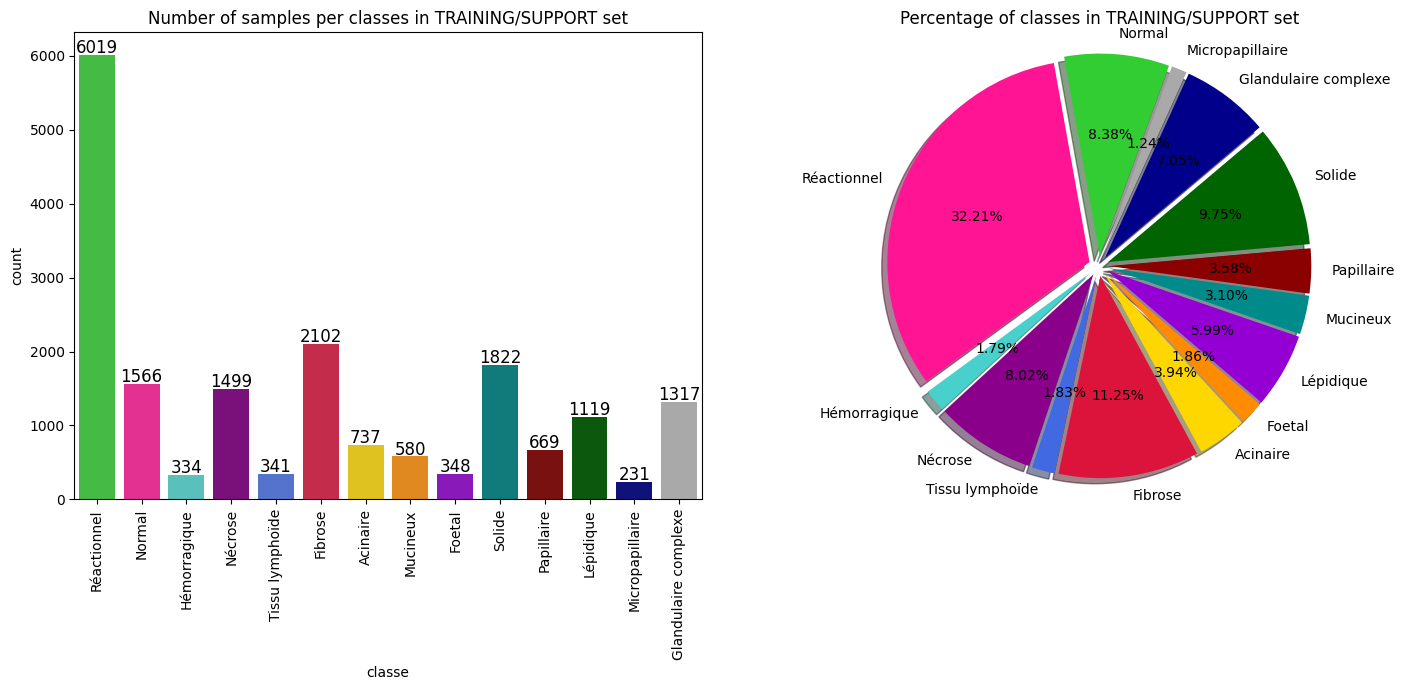

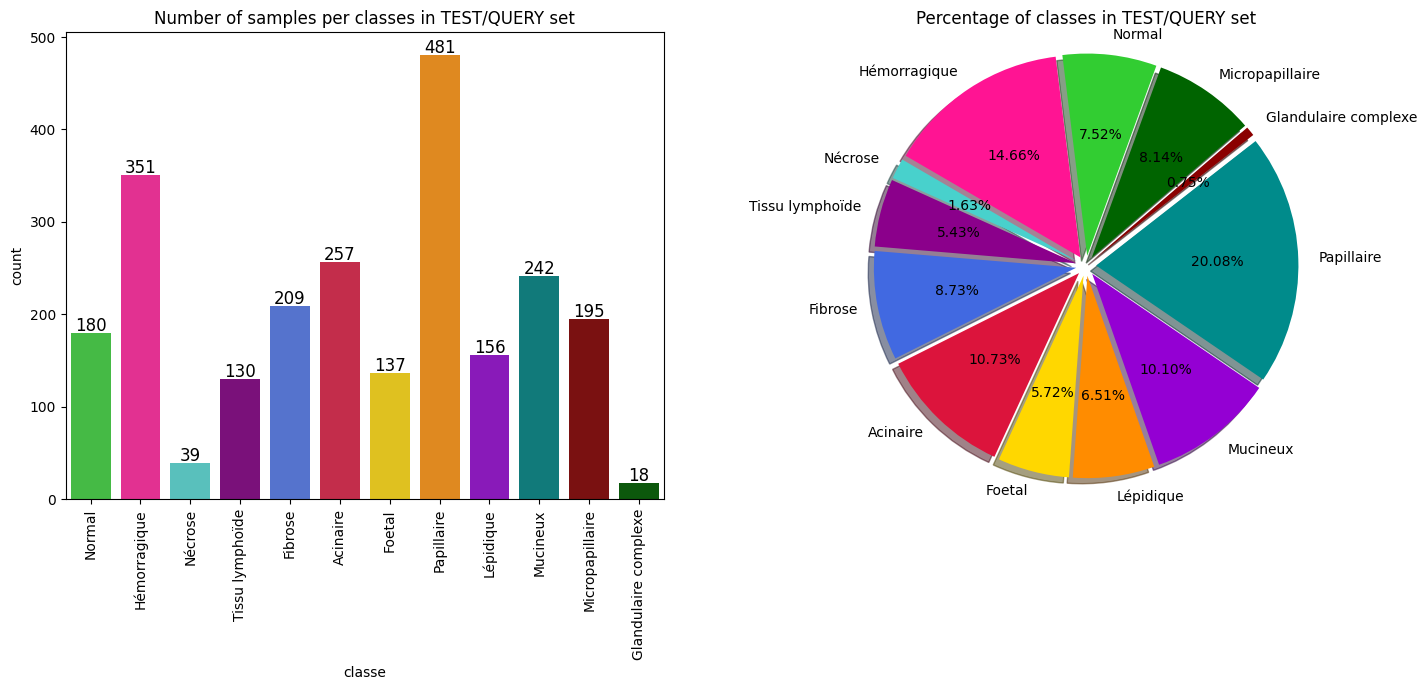

In [16]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.countplot(df_full_not_augmented.loc[df_full_not_augmented['dataset']=='train'], x='classe', palette=colors_classe)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation='vertical')
plt.title("Number of samples per classes in TRAINING/SUPPORT set")

plt.subplot(122)
sizes = [df_full_not_augmented.loc[df_full_not_augmented['dataset']=='train']["classe"].value_counts()[val] for val in all_classes.keys() if val in df_full_not_augmented["classe"].unique()]
plt.pie(sizes, explode=explode_c, labels=[val for val in all_classes.keys() if val in df_full_not_augmented["classe"].unique()], colors=colors_classe,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of classes in TRAINING/SUPPORT set')
plt.tight_layout()
plt.savefig(f'Statistics of training class splits {prefix}.jpeg')
plt.show()

plt.figure(figsize = (15,7))
plt.subplot(121)
sns.countplot(df_full_not_augmented.loc[df_full_not_augmented['dataset']=='test'], x='classe', palette=colors_classe)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation='vertical')
plt.title("Number of samples per classes in TEST/QUERY set")

plt.subplot(122)
sizes = [df_full_not_augmented.loc[df_full_not_augmented['dataset']=='test']["classe"].value_counts()[val] for val in all_classes.keys() if val in df_full_not_augmented.loc[df_full_not_augmented['dataset']=='test']["classe"].unique()]
expl_c=tuple([0.05]*len(sizes))
plt.pie(sizes, explode=expl_c, labels=[val for val in all_classes.keys() if val in df_full_not_augmented.loc[df_full_not_augmented['dataset']=='test']["classe"].unique()], colors=colors_classe,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of classes in TEST/QUERY set')
plt.tight_layout()
plt.savefig(f'Statistics of testing class splits {prefix}.jpeg')
plt.show()

In [18]:
for p in df_full_not_augmented['Patient'].unique():
    print(p,'\n',dict(df_full_not_augmented.loc[df_full_not_augmented['Patient']==p]['tetraClass'].value_counts()))

398 
 {'P': 1639, 'H': 97, 'Fi': 34, 'T': 34}
231 
 {'T': 1817, 'Fi': 577, 'P': 270, 'Né': 138, 'TL': 43, 'H': 16}
7 
 {'P': 3953, 'T': 604, 'Fi': 391, 'TL': 94, 'H': 6}
169 
 {'P': 531, 'T': 460, 'Fi': 24, 'H': 22}
247 
 {'T': 368, 'P': 156, 'Fi': 4}
9 
 {'Né': 1266, 'Fi': 942, 'P': 199, 'T': 115, 'H': 6}
72 
 {'T': 1284, 'P': 133, 'Fi': 126, 'TL': 46, 'H': 4}
3 
 {'P': 571, 'T': 36, 'Fi': 4, 'TL': 1}
40 
 {'T': 192, 'H': 14, 'P': 5, 'TL': 2}
2 
 {'T': 615, 'Fi': 208, 'H': 90, 'P': 53, 'TL': 20}
6 
 {'T': 146, 'P': 53, 'H': 3}
44 
 {'T': 242, 'H': 136, 'P': 103}
4 
 {'TL': 67, 'T': 52, 'P': 18, 'H': 8}
192 
 {'T': 137, 'H': 47, 'TL': 13, 'P': 6}
58 
 {'H': 22, 'TL': 18, 'T': 18, 'P': 13}
23 
 {'T': 115, 'P': 27, 'H': 15, 'TL': 4, 'Né': 1}
13 
 {'T': 237, 'P': 12, 'TL': 3, 'Fi': 1}
22 
 {'T': 58, 'P': 2}
17 
 {'Né': 39, 'T': 12, 'H': 10, 'TL': 3, 'P': 1}
5 
 {'T': 84, 'P': 15, 'TL': 4, 'H': 3}
14 
 {'T': 299, 'H': 12, 'P': 5, 'TL': 3}
16 
 {'Né': 86, 'T': 34, 'H': 2}
32 
 {'TL': 89, 'H

In [91]:
# Assuming df1 and df2 are your dataframes
df1 = df_full_not_augmented[df_full_not_augmented['patch'].str.contains(regex_general)]
df2 = df_full_not_augmented[df_full_not_augmented['patch'].str.contains(regex)]
sub = df1.merge(df2, how='outer', indicator=True)
sub = sub[sub['_merge'] == 'left_only']
sub

,Patient,lame,patch,classe,_merge
13389,2,B,2_B_row_P_23_col_47_VF.jpg,Papillaire,left_only
13804,2,B,2_B_row_P_23_col_49.jpg,Papillaire,left_only
13822,2,B,2_B_row_P_23_col_49_HF.jpg,Papillaire,left_only
13928,2,B,2_B_row_P_23_col_50.jpg,Papillaire,left_only
13930,7,A,7_A_row_1P_23_col_15.jpg,Papillaire,left_only
13955,2,B,2_B_row_P_23_col_47_HF.jpg,Papillaire,left_only
13969,7,A,7_A_row_1P_23_col_15_VF.jpg,Papillaire,left_only
14001,2,B,2_B_row_P_23_col_48_VF.jpg,Papillaire,left_only
14040,2,B,2_B_row_P_23_col_51_HF.jpg,Papillaire,left_only
14184,2,B,2_B_row_P_23_col_52_HF.jpg,Papillaire,left_only


In [92]:
df7 = df_full_not_augmented[df_full_not_augmented['Patient'] == 7]
df7

,Patient,lame,patch,classe
4,7,A,A_7_A (237)_HF.jpg,Acinaire
5,7,A,A_7_A (86)_VF.jpg,Acinaire
10,7,A,A_7_A (15)_VF.jpg,Acinaire
15,7,A,A_7_A (77)_VF.jpg,Acinaire
23,7,A,A_7_A (12).jpg,Acinaire
...,...,...,...,...
83351,7,A,7_A_row_132_col_50_VF.jpg,Tissu lymphoïde
83355,7,A,7_A_row_130_col_50_rot90.jpg,Tissu lymphoïde
83360,7,A,7_A_row_131_col_67_rot45.jpg,Tissu lymphoïde
83368,7,TL,TL_7_A (43)_rot135.jpg,Tissu lymphoïde
